<a href="https://colab.research.google.com/github/rsethi21/foldingML/blob/main/clusteringProteinDroplets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# set-up

In [1]:
!git clone https://github.com/rsethi21/foldingML.git

Cloning into 'foldingML'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 252 (delta 124), reused 194 (delta 73), pack-reused 0
Receiving objects: 100% (252/252), 4.57 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [2]:
import argparse
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

In [3]:
def access(fp, typ):

    if typ.lower() == "csv":

        with open(fp, "r") as file:
            return pd.read_csv(file)

    elif typ.lower() == "json":

        with open(fp, "r") as file:
            return json.load(file)

    else:

        print("Unknown file type. Must be one of the following options: csv, or json.")

In [ ]:
def unclustered(coordinates, condition = "pH 7 URQCH")

  original_fig, axs = plt.subplots(ncols=3)
  original_fig.suptitle(f"{condition} proteins' center of mass")

  titles = ["x vs y", "x vs z", "y vs z"]
  indices = [[0, 1], [0, 2], [1, 2]]

  for i, ax in enumerate(axs):
    ax.plot(coordinates[:,indices[i][0]], coordinates[:,indices[i][1]], "k.")
    ax.set_title(titles[i])

In [ ]:
def dscanClust(coordinates, eps=0.01, min_samples=3, condition = "pH 7 URQCH"):
  db = DBSCAN(eps=eps, min_samples=min_samples)
  db.fit(coordinates)
  predicted_clusters = db.fit_predict(coordinates)

  clustered_fig, clustered_axs = plt.subplots(ncols=3)
  clustered_fig.suptitle(f"{condition} proteins' center of mass (DBSCAN)")

  titles = ["x vs y", "x vs z", "y vs z"]
  indices = [[0, 1], [0, 2], [1, 2]]

  for clust_i, clust_ax in enumerate(clustered_axs):
    clust_ax.scatter(coordinates[:,indices[clust_i][0]], coordinates[:,indices[clust_i][1]], c=predicted_clusters, cmap='Paired')
    clust_ax.set_title(titles[clust_i])

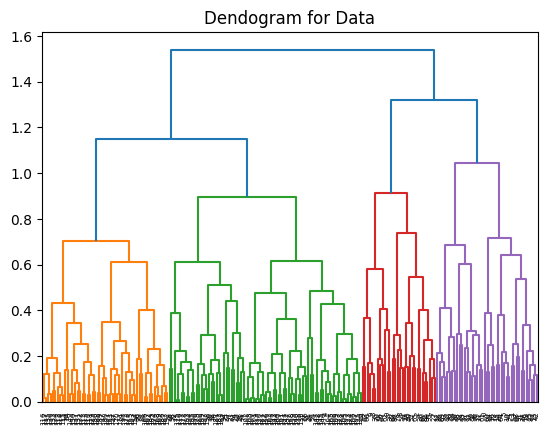

In [29]:
def hierarchical(coordinates, method="complete", condition = "pH 7 URQCH")
  dendo = plt.figure()
  plt.title("Dendogram for Data")
  dictionary = hierarchy.dendrogram(hierarchy.linkage(coordinates, method=method))

  clustered_dictionary = {}
  for leaf, cluster in zip(dictionary["leaves"], dictionary["leaves_color_list"]):
    clustered_dictionary[leaf] = int(cluster[-1])
  sorted_dictionary = {key: clustered_dictionary[key] for key in sorted(list(clustered_dictionary.keys()))}

  clustered_fig2, clustered_axs2 = plt.subplots(ncols=3)
  clustered_fig2.suptitle(f"{condition} proteins' center of mass (Hierarchical)")
  titles = ["x vs y", "x vs z", "y vs z"]
  indices = [[0, 1], [0, 2], [1, 2]]
  for clust_i2, clust_ax2 in enumerate(clustered_axs2):
    clust_ax2.scatter(coordinates[:,indices[clust_i2][0]], coordinates[:,indices[clust_i2][1]], c=list(sorted_dictionary.values()), cmap='Paired')
    clust_ax2.set_title(titles[clust_i2])

# prepare Data

In [4]:
traj3Coordinates = access("./foldingML/data/traj3COMTest.json", "json")
traj7Coordinates = access("./foldingML/data/traj7COMTest.json", "json")

In [5]:
struc1Traj3 = traj3Coordinates["0"]

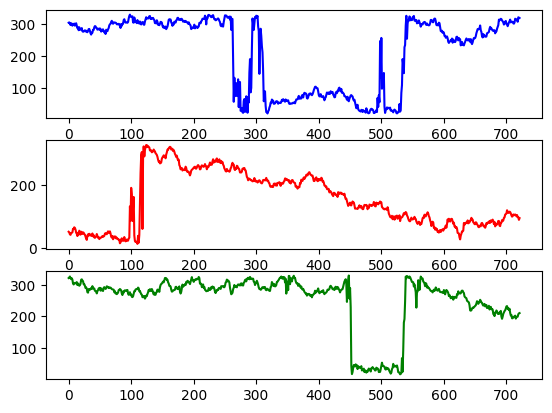

In [6]:
exampleStructure, axes = plt.subplots(len(struc1Traj3[0]))
colors = ['b', 'r', 'g']
labels = ['x', 'y', 'z']
for i, axis in enumerate(axes):
  axis.plot([struc1[frame][i] for frame in range(len(struc1))], color=colors[i], linestyle="-", label=labels[i])

In [18]:
frame1_coordinates_traj3 = MinMaxScaler().fit_transform(pd.DataFrame.from_dict({key: value[0] for key, value in traj3Coordinates.items()}, orient="index"))
final_coordinates_traj3 = MinMaxScaler().fit_transform(pd.DataFrame.from_dict({key: value[-1] for key, value in traj3Coordinates.items()}, orient="index"))

In [ ]:
frame1_coordinates_traj7 = MinMaxScaler().fit_transform(pd.DataFrame.from_dict({key: value[0] for key, value in traj7Coordinates.items()}, orient="index"))
final_coordinates_traj7 = MinMaxScaler().fit_transform(pd.DataFrame.from_dict({key: value[-1] for key, value in traj7Coordinates.items()}, orient="index"))

# DBSCAN

# hierarchical clustering